# UMAP & Watershed Plots

## UMAP Embeddings

In [54]:
# graph-tool native installation
import sys
sys.path.append('/opt/homebrew/opt/graph-tool/lib/python3.11/site-packages')
from graph_tool.draw.cairo_draw import graph_draw

import os
from data_factory import utils
import data_factory.plotting
from data_factory.plotting import * 

In [55]:
parameters = utils.set_parameters()
days = ['20210911', '20210912', '20210913', '20210914', '20210915', '20210916', '20210917', '20210918', '20210919', '20210920', '20210921', '20210922', '20210923', '20210924', '20210925', '20210926', '20210927', '20210928', '20210929', '20210930', '20211001', '20211002', '20211003', '20211004', '20211005', '20211006', '20211007', '20211008']
fish_keys = ['23442333_back', '23484201_back', '23484204_back', '23520257_back', '23520258_back', '23520264_back', '23520266_back', '23520268_back', '23520270_back', '23520276_back', '23520278_back', '23520289_back', '23442333_front', '23484201_front', '23484204_front', '23520257_front', '23520258_front', '23520264_front', '23520266_front', '23520268_front', '23520270_front', '23520276_front', '23520278_front', '23520289_front']
projectPath = parameters.projectPath
BLOCK = "block1"
fk_list = utils.get_individuals_keys(parameters=parameters, block='block1')
day_list = utils.get_days(parameters= parameters)

Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new
Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new/Projections
Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new/TSNE_Projections
Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new/TSNE
Skipping, path already exists : /Users/marv/Documents/work/soi/data_backup/Fish_moves_new/UMAP


In [56]:
wshed_path = os.path.join(projectPath, 'UMAP', 'zVals_wShed_groups_10.mat')
wshed_dict = load_watershed_file(wshed_path)

In [57]:
import importlib
importlib.reload(data_factory.plotting)
from data_factory.plotting import * 

### scatter for one individual / day

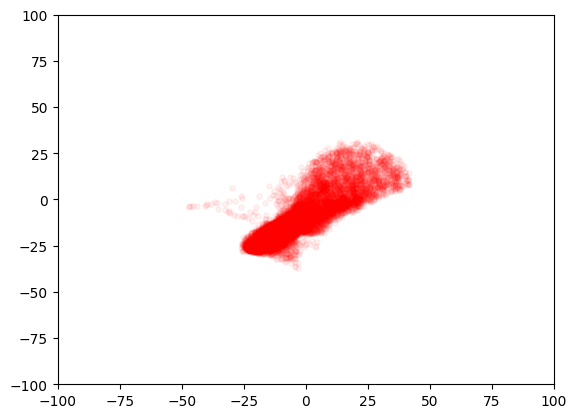

In [58]:
%matplotlib inline

# fig, ax = plt.subplots()

fig_scatter_one, ax_scatter_one = get_umap_scatter_figure_per_fk_day(
    parameters = parameters,
    fish_key = fk_list[0],
    day = day_list[0],
    figure_color='red',
    point_size = 15,
    alpha_transparency = 0.05,
    data_restriction={'nth_value': 10},
    axis_limit_tuple = ([-100, 100], [-100, 100]),
    overloaded_figure= None,
    include_axis_visualization = True, 
    plot_figure = False
)

### scatter over all datasets

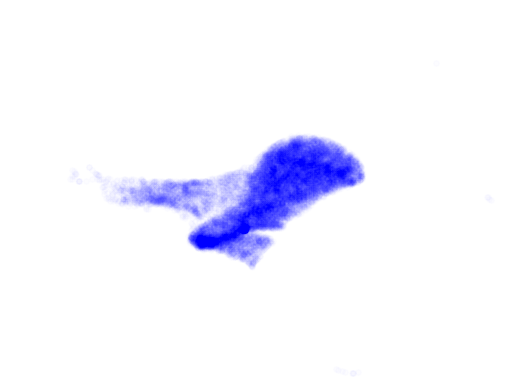

In [59]:
# fig, ax = plt.subplots()

fig_scatter_all, ax_scatter_all = umap_scatter_figure_for_all(
    parameters = parameters, 
    point_size = 15,
    alpha_transparency = 0.01,
    figure_color= 'blue',
    data_restriction = {'nth_value': 10000}, 
    elements_restriction = None,
    axis_limit_tuple = ([-100, 100], [-100, 100]),
    overloaded_figure= None, 
    include_axis_visualization = False, 
    plot_figure = False
)

### UMAP Density

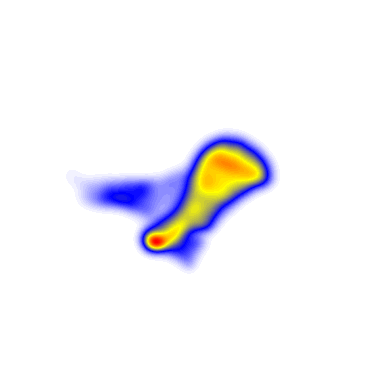

In [60]:
fig_density, ax_density = get_umap_density_figure(
    umap_embedding = wshed_dict['density'], 
    extent_factor = wshed_dict['xx'][0][-1], 
    axis_limit_tuple = ([-100, 100], [-100, 100]),
    overloaded_figure=None, 
    include_axis_visualization = False, 
    plot_figure = False
)

## Trajectories in UMAP Space
_using Watershed Boundaries_

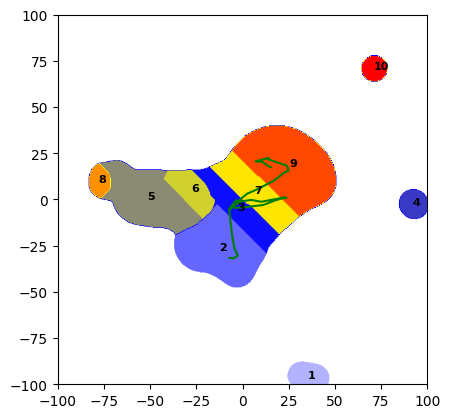

In [61]:

fig_umap_orig, ax_umap_orig = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 50,
        axis_limit_tuple = ([-100, 100], [-100, 100]),
        trajectory_color= 'green',
        include_axis_visualization= True, 
        plot_figure= True
    )

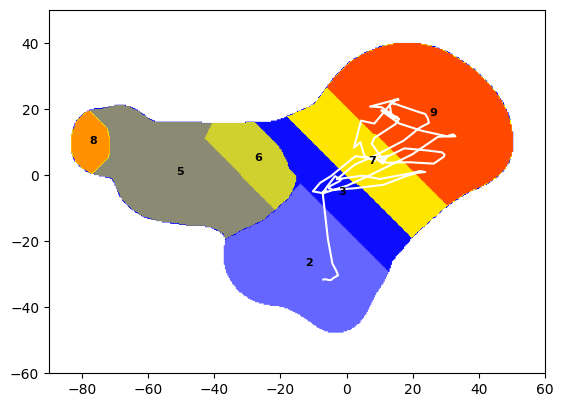

In [62]:
fig_umap_subsize, ax_umap_subsize = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= True, 
        plot_figure= True
    )

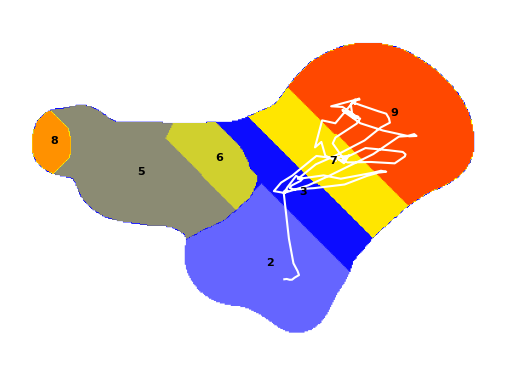

In [63]:
fig_umap_subsize_2, ax_umap_subsize_2 = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'clusters', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'white',
        include_axis_visualization= False, 
        plot_figure= True
    )

### Trajectories with UMAP Density
_and Watershed Cluster Boundaries_

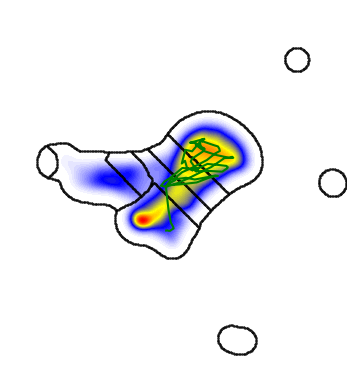

In [64]:
fig_density_traj, ax_density_traj = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'boundaries', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-100, 100], [-120, 100]),
        trajectory_color= 'green',
        include_axis_visualization= False, 
        plot_figure= True
    )

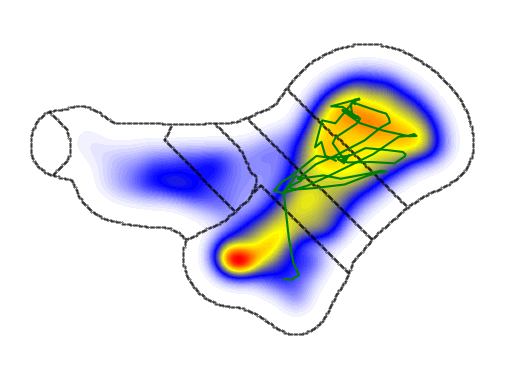

In [65]:
fig_density_traj_subsize, ax_density_traj_subsize = plot_umap_trajectories_and_watershed_characteristics(
        parameters,
        wshed_path,
        fk_list[0],
        day_list[0],
        mode = 'boundaries', 
        data_restriction_limit= 100,
        axis_limit_tuple = ([-90, 60], [-60, 50]),
        trajectory_color= 'green',
        include_axis_visualization= False, 
        plot_figure= True
    )